In [1]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_circles, make_moons, make_blobs


# 2 features binary classification

Accuracy:  1.0


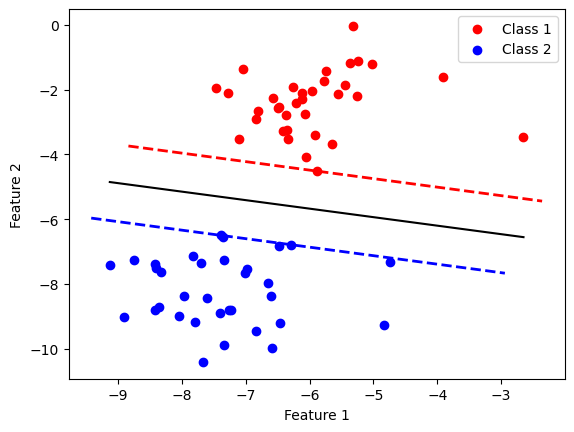

In [38]:
# Change this to change classes and features considered. Don't use class 1 and 2 toghether as they are not linearly separable at all.
class1 = 0
class2 = 1
feature1 = 0
feature2 = 1

X,y = make_blobs(n_samples=100, cluster_std=0.96)

X = X[np.logical_or(y == class1, y == class2)]
y = y[np.logical_or(y == class1, y == class2)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

svm = SVC(kernel='linear', C=1) #hard margin C=inf 
svm.fit(X_train,y_train)

print('Accuracy: ', svm.score(X_test, y_test))

#Plot decision boundary
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svm.intercept_[0]) / w[1]
plt.plot(xx, yy, 'black')

#Plot margins
w_hat = svm.coef_[0] / (np.sqrt(np.sum(svm.coef_[0] ** 2)))
margin = 1 / np.sqrt(np.sum(svm.coef_[0] ** 2))
decision_boundary_points = np.array(list(zip(xx, yy)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
plt.plot(points_of_line_above[:, 0], points_of_line_above[:, 1], 'b--', linewidth=2)
plt.plot(points_of_line_below[:, 0], points_of_line_below[:, 1], 'r--', linewidth=2)
colors = ['r', 'b']
for i, color in zip([class1, class2], colors):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label=f'Class {i+1}')

plt.xlabel(f'Feature {feature1+1}')
plt.ylabel(f'Feature {feature2+1}')
plt.legend()
plt.show()

Accuracy:  0.36666666666666664


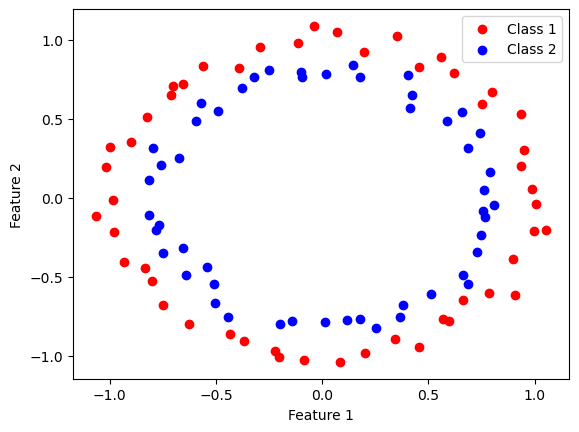

In [51]:
# Change this to change classes and features considered. Don't use class 1 and 2 toghether as they are not linearly separable at all.
class1 = 0
class2 = 1
feature1 = 0
feature2 = 1

X,y = make_circles(n_samples=100, noise=0.05)

X = X[np.logical_or(y == class1, y == class2)]
y = y[np.logical_or(y == class1, y == class2)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

svm = SVC(kernel='linear', C=1) #hard margin C=inf 
svm.fit(X_train,y_train)

print('Accuracy: ', svm.score(X_test, y_test))


colors = ['r', 'b']
for i, color in zip([class1, class2], colors):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label=f'Class {i+1}')

plt.xlabel(f'Feature {feature1+1}')
plt.ylabel(f'Feature {feature2+1}')
plt.legend()
plt.show()

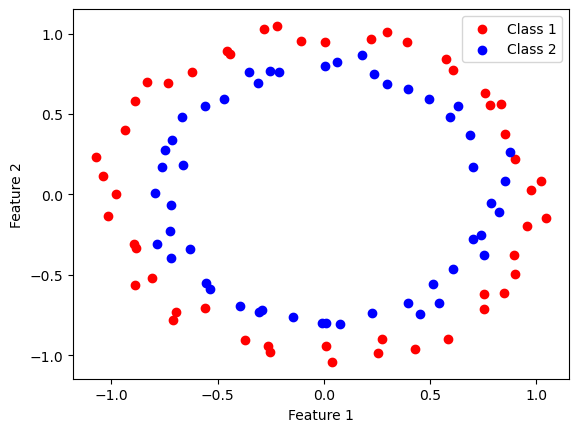

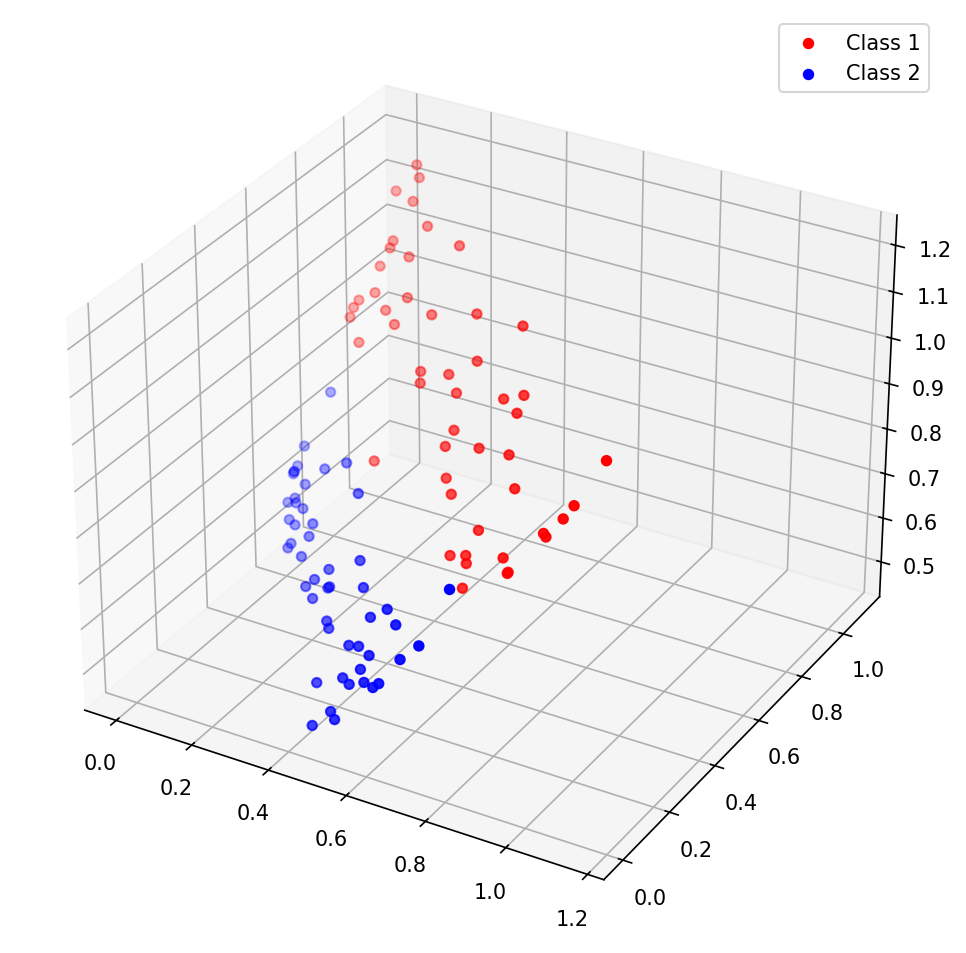

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

# Genera il dataset
X, y = make_circles(n_samples=100, noise=0.05)

colors = ['r', 'b']
for i, color in zip(np.unique(y), colors):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, label=f'Class {i+1}')

plt.xlabel(f'Feature {feature1+1}')
plt.ylabel(f'Feature {feature2+1}')
plt.legend()
plt.show()

# Applica la mappa delle feature ai dati
X_mapped = np.array([[x[0]**2, x[1]**2, x[0]**2+x[1]**2] for x in X])

# Crea un plot 3D del risultato
fig = plt.figure(figsize=(12, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Differenzia i punti in base alla classe con i colori specificati
colors = ['r', 'b']
for class_value, color in zip(np.unique(y), colors):
    ax.scatter(
        X_mapped[y == class_value, 0], 
        X_mapped[y == class_value, 1], 
        X_mapped[y == class_value, 2], 
        color=color, 
        label=f'Class {class_value + 1}'
    )

# Aggiunge etichette e leggenda
ax.legend()

# Mostra il grafico
plt.show()
